<a href="https://colab.research.google.com/github/Hansulich/park/blob/main/ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch  1 | MSE: 2.526595 | MAPE: 219.46%
Epoch  2 | MSE: 1.453471 | MAPE: 458.76%
Epoch  3 | MSE: 1.447387 | MAPE: 460.48%
Epoch  4 | MSE: 1.443377 | MAPE: 461.61%
Epoch  5 | MSE: 1.440540 | MAPE: 462.42%
Epoch  6 | MSE: 1.438430 | MAPE: 463.03%
Epoch  7 | MSE: 1.436802 | MAPE: 463.49%
Epoch  8 | MSE: 1.435511 | MAPE: 463.87%
Epoch  9 | MSE: 1.434462 | MAPE: 464.17%
Epoch 10 | MSE: 1.433595 | MAPE: 464.43%
Epoch 11 | MSE: 1.432866 | MAPE: 464.64%
Epoch 12 | MSE: 1.432246 | MAPE: 464.83%
Epoch 13 | MSE: 1.431713 | MAPE: 464.99%
Epoch 14 | MSE: 1.431249 | MAPE: 465.13%
Epoch 15 | MSE: 1.430842 | MAPE: 465.25%
Epoch 16 | MSE: 1.430482 | MAPE: 465.36%
Epoch 17 | MSE: 1.430163 | MAPE: 465.46%
Epoch 18 | MSE: 1.429877 | MAPE: 465.54%
Epoch 19 | MSE: 1.429619 | MAPE: 465.62%
Epoch 20 | MSE: 1.429386 | MAPE: 465.70%
Epoch 21 | MSE: 1.429175 | MAPE: 465.76%
Epoch 22 | MSE: 1.428982 | MAPE: 465.82%
Epoch 23 | MSE: 1.428805 | MAPE: 465.88%
Epoch 24 | MSE: 1.428643 | MAPE: 465.93%
Epoch 25 | MSE: 

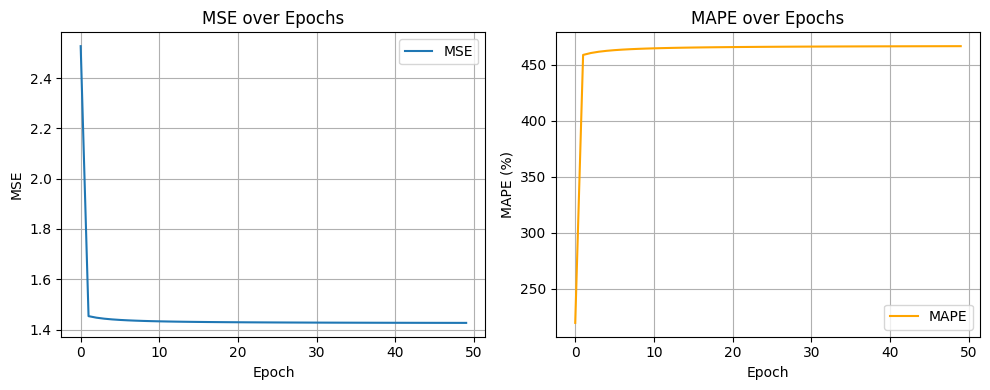

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수 및 도함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# 비용 함수
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

np.random.seed(0)
samples = 1000

x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

X = np.column_stack((x1, x2))

y = 2 * x1 + 3 * x2 - 1
y = y.reshape(-1, 1)  # (1000, 1)

input_size = 2      # x1, x2
hidden_size = 3     # h1, h2, h3
output_size = 1     # y_hat

# 가중치 및 편향 초기화
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# 하이퍼파라미터
learning_rate = 0.01
epochs = 50

# 손실 기록용 리스트
mse_history = []
mape_history = []

for epoch in range(epochs):
    # 순전파
    z1 = X.dot(W1) + b1
    h = sigmoid(z1)
    z2 = h.dot(W2) + b2
    y_hat = sigmoid(z2)

    # 손실 계산
    loss_mse = mse(y, y_hat)
    loss_mape = mape(y, y_hat)
    mse_history.append(loss_mse)
    mape_history.append(loss_mape)

    # 출력층 역전파
    dz2 = (y_hat - y) * sigmoid_derivative(z2)
    dW2 = h.T.dot(dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # 은닉층 역전파
    dz1 = dz2.dot(W2.T) * sigmoid_derivative(z1)
    dW1 = X.T.dot(dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # 파라미터 업데이트
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    print(f"Epoch {epoch+1:2d} | MSE: {loss_mse:.6f} | MAPE: {loss_mape:.2f}%")


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE over Epochs')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mape_history, label='MAPE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MAPE (%)')
plt.title('MAPE over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

